***Surya Dwi Prasetya (SC62524)***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Sebelum melakuan  Data Preparation, Exploratory Data Analysis (EDA) dan Feature Engineering ...saya akan menjelaskan lebih dahulu tentang penjelasan umum dari setiap fitur yang ada

1. age --> umur para subject, msekipun ini dfset heart disease, tapi tidak semua yang tercantum disini memiliki heath disease

2. sex --> rentang umur dari para subject

3. chest pain type (4 values) / cp --> ada 4 kategori yang tidak dijelaskan secara detail di deskripsi pada kaggle, nampaknya semakin tinggi kategori chest pain semakin parah chest pain nya

4. resting blood pressure / trestbps --> ini adalah Resting blood pleasure yang nilainya tergantung pemeriksaan pada para subject data

5. serum cholestoral in mg/dl / chol --> ini adalah adalah ukuran konsentrasi kolesterol dalam darah.

6. fasting blood sugar > 120 mg/dl / fbs --> ini adalah ukuran kadar glukosa dalam darah setelah seseorang berpuasa atau tidak makan selama minimal 8 jam. 

7. resting electrocardiographic results (values 0,1,2) / restecg --> Resting electrocardiographic results (hasil elektrokardiogram istirahat) adalah variabel dalam dataset kesehatan yang umumnya digunakan dalam penelitian medis terkait penyakit jantung

8. maximum heart rate achieved / thalach --> ini adalah istilah yang digunakan untuk merujuk pada detak jantung maksimum yang dicapai seseorang selama latihan fisik atau tes stres jantung. Ini adalah ukuran dari seberapa keras jantung seseorang bekerja selama aktivitas fisik yang intensitasnya tinggi.

9. exercise induced angina / exang --> Angina yang dipicu oleh latihan (Exercise-Induced Angina) adalah kondisi di mana seseorang mengalami nyeri dada atau discomfort saat melakukan aktivitas fisik atau olahraga tertentu

10. ST depression induced by exercise relative to rest / oldpeak --> ialah sebuah parameter yang diukur dalam tes latihan jantung (exercise stress test). Ini mengacu pada penurunan segmen ST pada elektrokardiogram (EKG) yang terjadi selama atau setelah latihan fisik yang diinduksi secara sementara, dibandingkan dengan istirahat.

11. the slope of the peak exercise ST segment / slope --> "Slope of the peak exercise ST segment" adalah istilah yang digunakan dalam konteks tes latihan jantung (exercise stress test) untuk mengevaluasi aktivitas listrik jantung selama latihan fisik yang meningkat, sedangkan ST segment adalah bagian dari elektrokardiogram (EKG) yang merekam aktivitas listrik jantung. Pada kondisi normal.

12. number of major vessels (0-3) colored by flourosopy / ca  --> mengacu pada jumlah pembuluh darah besar yang terlihat pada hasil pemeriksaan fluoroskopi.."0-3" mengacu pada jumlah arteri koroner besar (biasanya arteri koroner utama kiri, arteri koroner kanan, dan arteri koroner anterior) yang tampak terwarnai oleh kontras selama prosedur. 0 = tidak ada arteri besar yang terkena penyumbatan atau plak yang terdeteksi, 1 = menunjukkan satu arteri besar yang terkena penyumbatan atau plak, 2 = menunjukkan dua arteri besar yang terkena penyumbatan atau plak dan 3 = menunjukkan tiga arteri besar yang terkena penyumbatan atau plak

13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect / thal --> ini adalah kandungan thalium

14. The names and social security numbers of the patients were recently removed from the database, replaced with dummy values / target --> berdasarkan deskripsi kaggle, nilai 1= yes, dan 0= no...tapi beda beda kak, ada yang bialng dari sumber lain 0=yes dan 1= no, tapi aku ikut yang di deskripsi kaggle ya kak..mohon jangan disahkan kalau yg di deskripsi kaggle salah 😔😔😔

# **Data Preparation**

---

# **Handling Duplicate value**

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
df.shape

(1025, 14)

In [6]:
df.duplicated().any()

True

In [7]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Dari total 1025 baris di dataset ini, ada total 723 baris duplikat..jika kita melakukan drop duplikat, hal ini akan menjatuhkan jauh sekali jumlah data yang kita punya..dan lagipula di dalam dataset ini tidak ada primary key, dengan kata lain, kita tidak perlu melakukan drop duplikat karena kita tidak bisa menebak apakah itu murni keduplikatan data atau karena kebetulan semata..pilihan terbaik adalah tidak melakukan drop duplikat pada dataset ini.


# **Handling Missing value**

In [8]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

Di dalam dataset ini tidak ada Missing value..dengan kata lain kita tidak perlu melakukan handling pada Missing value

# **Handling Outlier**

Mari kita identifikasi outlier yang ada pada datset ini

In [9]:
for column in df.columns:
    print(f"value counts pada kolom {column} adalah: {df[column].value_counts()}")
    print("\n")

value counts pada kolom age adalah: 58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: age, dtype: int64


value counts pada kolom sex adalah: 1    713
0    312
Name: sex, dtype: int64


value counts pada kolom cp adalah: 0    497
2    284
1    167
3     77
Name: cp, dtype: int64


value counts pada kolom trestbps adalah: 120    128
130    123
140    107
110     64
150     55
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
124     20
135     20
145     17
134     17
152     17
170     15
122     14
100     14
136     11
126     10
180     10
142      9
115      9
105      9
146      8
148      7
178      7
94       7
144      6


berdasarkan data di atas...kolom bertipe kategorikal adalah sex, cp, fbs, restecg, exang, slope, slope, dan thal

ada 2 kejanggalan tertentu pada kolom dengan tipe kategorikal:

1. ca --> cp pada deskripsi kaggle punya rentang dari 0-3, tapi dari deskripsi di atas ada nilai 4, ini merupakan outlier
2. thal --> thal pada deskripsi kaggle punya rentang 1-3, tapi dari deskripsi di atas ada nilai 0, ini merupakan outlier

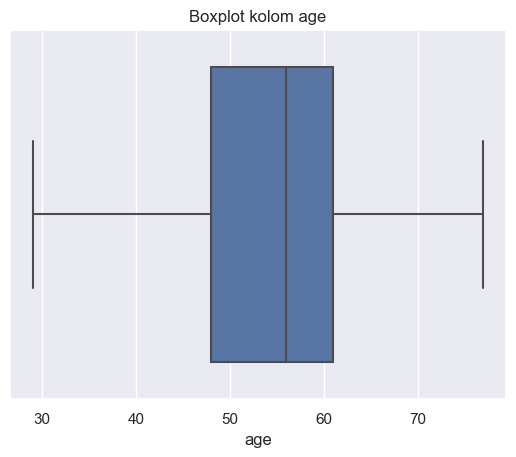

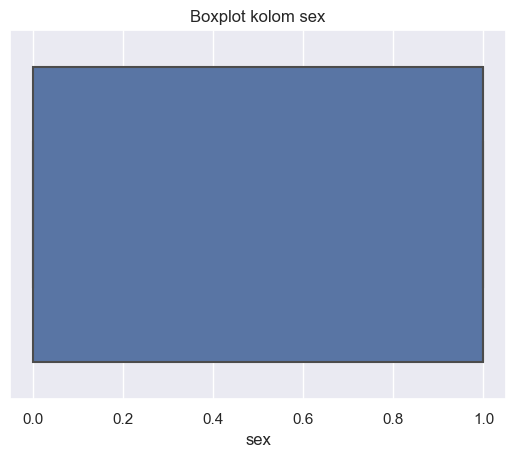

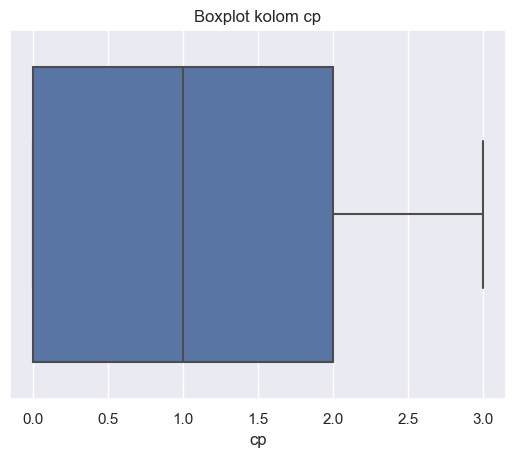

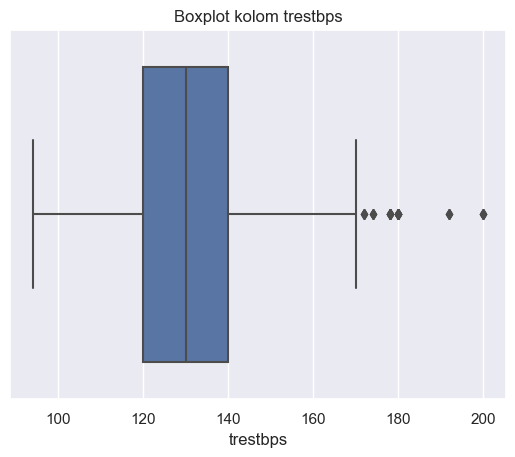

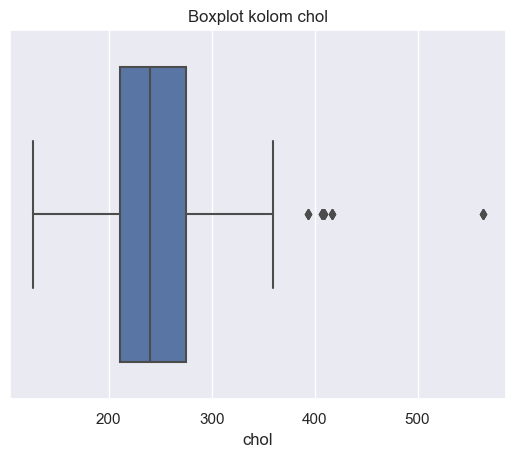

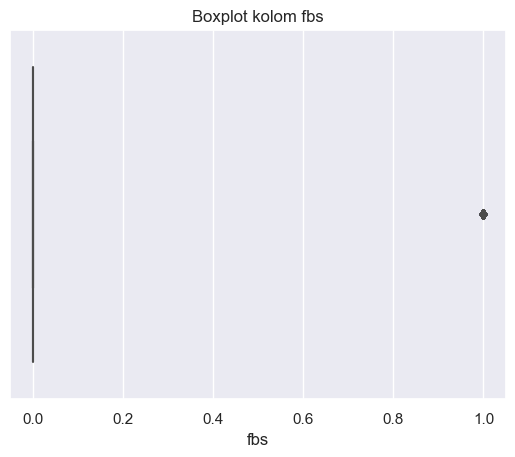

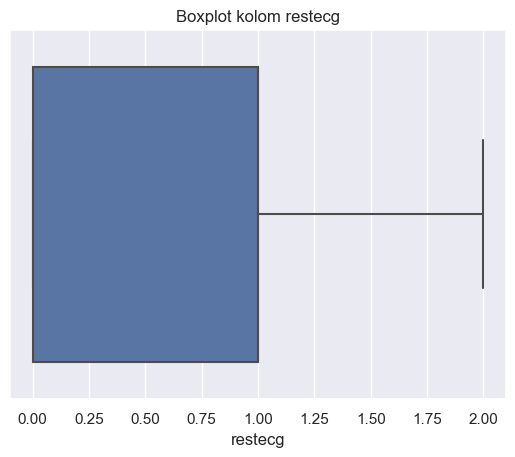

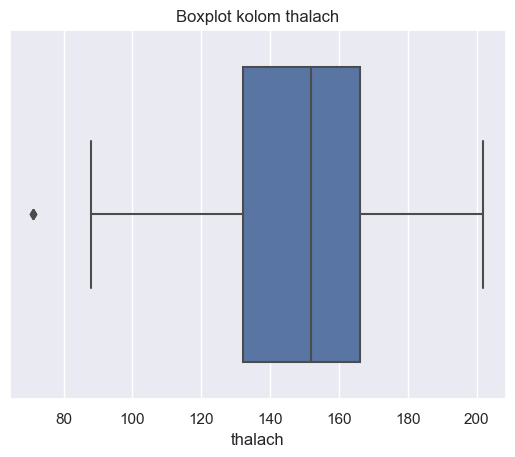

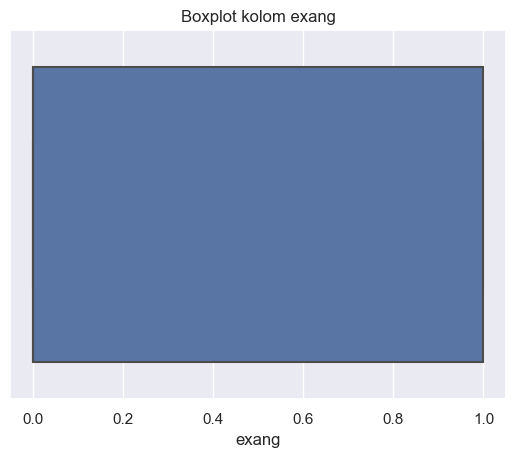

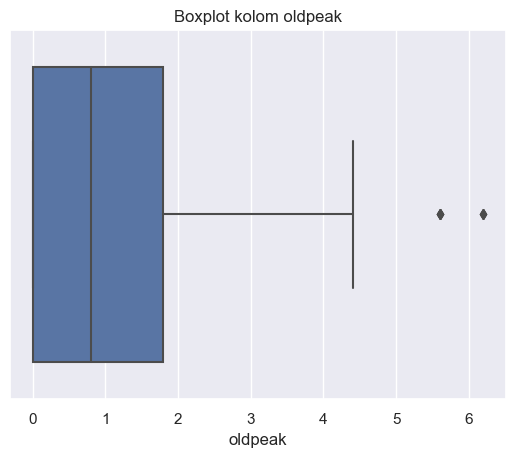

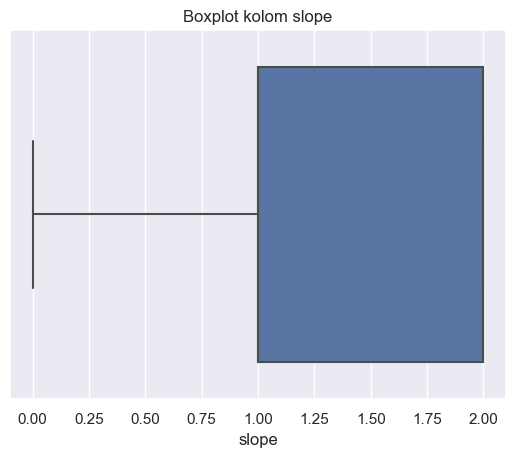

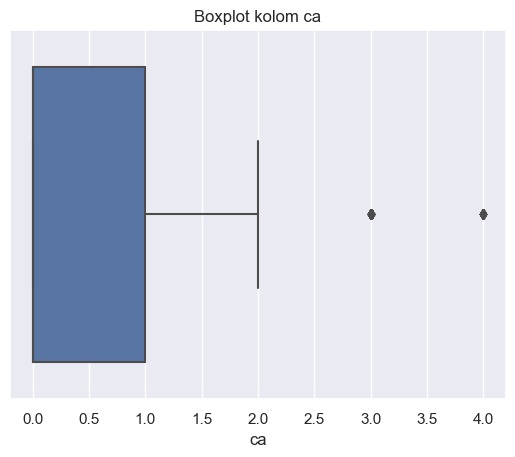

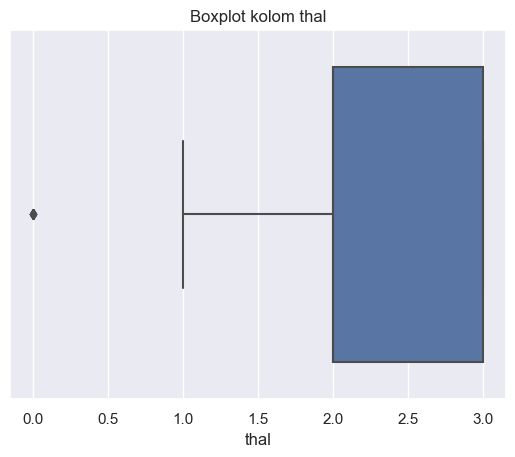

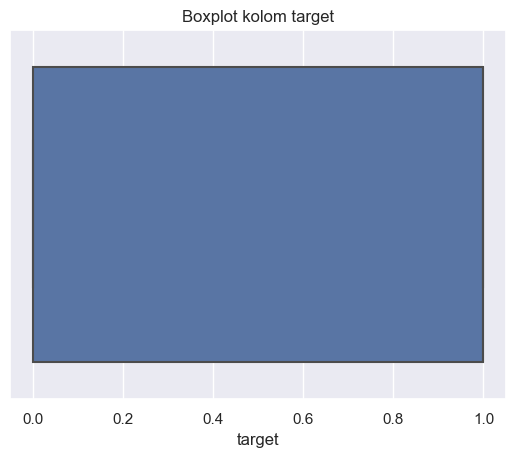

In [10]:
sns.set(style="darkgrid")

for column in df.columns:
    plt.figure()
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot kolom {column}")
    plt.show()

Yang ter-identifikasi ada outliernya berdasarkan box plot ialah kolom thal, ca, oldpeak, thalach, fbs, chol dan trestbps

mari cek lagi lebih detali posisi dan nilai dari setiap outlier yang ada...

In [11]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.5)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5*IQR
    batas_atas = Q3 + 1.5*IQR
    print(f"Q1 dari {col} adalah : {Q1}")
    print(f"Q2 dari {col} adalah : {Q2}")
    print(f"Q2 dari {col} adalah : {Q3}")
    print(f"IQR dari {col} adalah : {IQR}")
    print(f"Batas bawah dari {col} adalah : {batas_bawah}")
    print(f"Batas atas dari {col} adalah : {batas_atas}")
    outlier_bawah = df[col][df[col] < batas_bawah]
    outlier_atas = df[col][df[col] > batas_atas]
    if not outlier_bawah.empty:
        print(f"Di {col} ada outlier di bawah batas bawah:")
        print(outlier_bawah)
    if not outlier_atas.empty:
        print(f"Di {col} ada outlier di atas batas atas:")
        print(outlier_atas)
    print("\n")

Q1 dari age adalah : 48.0
Q2 dari age adalah : 56.0
Q2 dari age adalah : 61.0
IQR dari age adalah : 13.0
Batas bawah dari age adalah : 28.5
Batas atas dari age adalah : 80.5


Q1 dari sex adalah : 0.0
Q2 dari sex adalah : 1.0
Q2 dari sex adalah : 1.0
IQR dari sex adalah : 1.0
Batas bawah dari sex adalah : -1.5
Batas atas dari sex adalah : 2.5


Q1 dari cp adalah : 0.0
Q2 dari cp adalah : 1.0
Q2 dari cp adalah : 2.0
IQR dari cp adalah : 2.0
Batas bawah dari cp adalah : -3.0
Batas atas dari cp adalah : 5.0


Q1 dari trestbps adalah : 120.0
Q2 dari trestbps adalah : 130.0
Q2 dari trestbps adalah : 140.0
IQR dari trestbps adalah : 20.0
Batas bawah dari trestbps adalah : 90.0
Batas atas dari trestbps adalah : 170.0
Di trestbps ada outlier di atas batas atas:
29     180
47     178
87     174
137    180
151    192
175    200
229    178
246    192
257    180
294    200
326    192
343    172
396    180
436    174
452    178
496    180
508    200
509    180
528    178
609    180
624    178
636  

Karena dalam penangganan outlier, yang outliernya perlu kita handling hanyalah pada kolom dengan tipe numrikal sedangkan untuk tipe kategorikal tidak perlu untuk kita handling..jadi kita akan skip handling outlier untuk kolom kategorikal..sedangkan untuk kolom numerikal yaitu kolom trestbps, chol, fbs, thalach, oldpeak, ca, dan thal...akan kita analisis lebih lanjut

Berdasarkan analisis lebih mendalam berdasarkan deskripsi dataset dari Kaggle untuk kolom trestbps, chol, fbs, thalach, oldpeak, ca, dan thal adalah sebagai berikut:

1. trestbps --> Resting blood pleasure, ini adalah tekanan darah dalam arteri saat seseorang beristirahat atau tidak melakukan aktivitas fisik yang signifikan, diatas 170 seseorang mungkin kena tapi jarang..tapi karena dalam konteks penyakit jantung, resting blood pleasure merupakan indikasi utama apakah seseorang terkena penyakit jantung, maka outlier di trestbps akan di abaikan.


2. chol --> serum cholestoral in mg/dl, ini adalah konsentrasi kolestrol dalam darah..serum kolestrol diatas 370 jarang terjadi,dan lagipula datanya hanya sedikit yang lewat 370, tapi hal ini tidak menutup kemungkinan, dan karena serum kolestrol merupakan salah satu faktor utama sesorang bisa terkena penyakit jantung, jadi outlier di kolom chol akan kita abaikan.


3. fbs --> fasting blood sugar, Fasting blood sugar (FBS) adalah kadar glukosa dalam darah setelah seseorang berpuasa atau tidak makan apa pun selama minimal 8 jam...dalam df card dari sumber df di kaggle, disebutkan fasting blood sugar > 120 mg/dl..0 diartikan dengan false dan 1 dengan true..tapi hanya karena dfnya cuman 0 dan 1 ngak mungkin kan 1 ngak muncul sama sekali, jadi karena batas bawah dan atas 0, sedangkan 1 ini masih logis..kita akan biarkan outlier pada kolom ini.

4. thalach --> maximum heart rate achieved, ini adalah jumlah detak jantung maksimum yang dapat dicapai oleh seseorang selama latihan fisik atau aktivitas yang menghasilkan stres maksimum pada jantung, maximum heart rate achived bukan lah faktor utama sesorang memiliki penyakit jantung, sesorang bisa saja mempunyai maximum heart rate achieved dibawah 70 karena berbagai faktor kebugaran kardivaskular, jadi saya rasa outlier di kolom thalach akan dibiarkan.

5. oldpeak --> ST depression induced by exercise relative to rest, ini mengacu pada penurunan segment ST pada elektrokardiogram (EKG) yang terjadi selama latihan fisik dibandingkan dengan saat istirahat, ST depression induced by exercise relative to rest bukanlah faktor utama sesorang terkena penyakit jantung, namun ST depression induced by exercise relative to rest dengan 5.6mm keatas bisa menjadi indikator sesorang mengalami sakit jantung, jadi outlier pada kolom ini akan dibiarkan


6. ca --> number of major vessels (0-3) colored by flourosopy, mengacu pada jumlah pembuluh darah besar yang terlihat pada hasil pemeriksaan fluoroskopi..rentangnya hanya 3 jadi angka 0-3 tidak bisa dianggap outlier karena masih kemungkinan meskipun sedikit yang di angka 3, tapi karena masuk jenjang jadi angka 3 bakalan kita keculikan..tapi yang jadi masalah di sini ialah ada angka 4 yang diluar rentang..dan itu yang akan kita mask ke 3 karena angka 4 cuman muncul sangat sedikit



7. thal --> thal: 1 = normal; 2 = fixed defect; 3 = reversable defect, ini adalah thalium, yang biasanya merujuk pada hasil dari tes thallium atau tes myocardial perfusion imaging (MPI)...rentangnya adalh 1 sampai 3...di data dijelaskan 0 adalah outlier, dan karena nilai 0 muncul hanya sedikit, maka kita akan drop tahl dengan baris 0.


berdasarkan analisis di atas..maka saya tidak akan menggangu outlier pada setiap kolom dikarenakan setiap kolom yang teridentivikasi outlier punya korelasi yang berpengaruh terhadap penyakit jantung itu sendiri...outlier pada kolom ca yang lebih dari 3 saja yang akan saya analisis lebih lanjut, dan terakhir pada kolom thal yang punya nilai 0, akan saya drop barisnya

saya akan melakukan analisis pada kolom ca

In [12]:
df["ca"].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

pada kolom ca ini, ca==4 hanya sedikit, jadi daripada kolom ca==4 menggangu dataset secara keseluruhan, maka kita akan drop kolom ca==4

In [13]:
df.drop(df[df["ca"] == 4].index, inplace=True)

In [14]:
df["ca"].value_counts()

0    578
1    226
2    134
3     69
Name: ca, dtype: int64

In [15]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


sekarang semua baris dengan ca==4 sudah teratasi...selanjutnya cleaning outlier pada kolom thal

In [16]:
df["thal"].value_counts()

2    533
3    403
1     64
0      7
Name: thal, dtype: int64

In [17]:
df.drop(df[df["thal"] == 0].index, inplace=True)

In [18]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [19]:
df["thal"].value_counts()

2    533
3    403
1     64
Name: thal, dtype: int64

sekarang semua outlier yang ada saya rasa sudah teratasi semua

# **Handling Imbalance data**

pada bagian ini...kita hanya akan melihat kolom target, karena kolom target adalah kolom penentu apakah sesorang terkena penyakit jantung atau tidak, jadi jikalau kolom target ada imbalance data, maka akan kita balancing kolom target

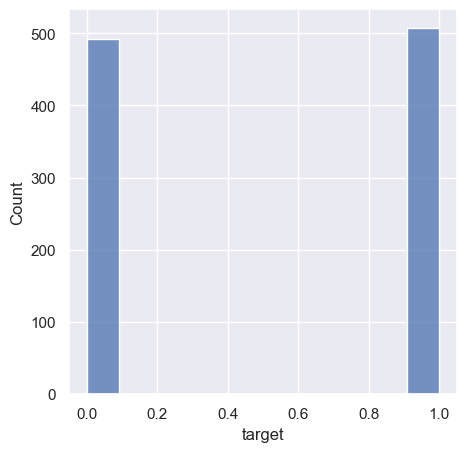

In [20]:
fig, axes = plt.subplots(1, figsize=(5,5))

sns.histplot(data=df,x="target", ax=axes)
plt.show()

pada histogram diatas..nampak bahwa tidak terjadi imbalance data pada kolom target, ini menandakan kita tidak perlu melakukan balancing data pada kolom target

# **Feature encoding**

Tidak perlu lagi melakukan feature encoding...dikarenakan semua feature yang ada sudah dalam bentuk integer atau float, tidak ada lagi yang dalam bentuk string

# **Exploratory Data Analysis (EDA)**

---

# **Mengelaborasi features dan tipe data (nominal, ordinal, numerical)**

In [21]:
for i in df.columns:
    print(f"Shape dari kolom {i} adalah: {df[i].shape}")
    print(f"Tipe df dari kolom {i} adalah: {df[i].dtype}")
    print(f'Isi dari kolom {i} berbentuk: \n{df[i].value_counts()}')
    print("\n")

Shape dari kolom age adalah: (1000,)
Tipe df dari kolom age adalah: int64
Isi dari kolom age berbentuk: 
58    64
57    57
54    53
59    46
56    39
51    39
62    37
60    37
44    36
52    36
64    34
41    32
63    32
61    31
67    31
55    30
65    27
42    26
66    25
45    25
48    23
43    23
53    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
40    11
71    11
69     9
37     6
34     6
29     4
38     4
76     3
77     3
74     3
Name: age, dtype: int64


Shape dari kolom sex adalah: (1000,)
Tipe df dari kolom sex adalah: int64
Isi dari kolom sex berbentuk: 
1    691
0    309
Name: sex, dtype: int64


Shape dari kolom cp adalah: (1000,)
Tipe df dari kolom cp adalah: int64
Isi dari kolom cp berbentuk: 
0    490
2    270
1    163
3     77
Name: cp, dtype: int64


Shape dari kolom trestbps adalah: (1000,)
Tipe df dari kolom trestbps adalah: int64
Isi dari kolom trestbps berbentuk: 
120    128
130    123
140    107
110     64
150     55
160     36
12

berdasarkan kode di atas..dapat disimpulkan sebagai berikut:

1. Kolom age adalah tipe data numerik diskrit, karena umur di sini nilai-nilainya tetap di kisaran bilangan bulat.

2. kolom sex adalah tipe adalah data  kategorikal, meskipun sekarang 1 merepresentasikan male dan 0 female, tapi karena angka tersebut tidak memiliki urutan atau nilai numerik yang sebenarnya, mereka hanya berperan sebagai label untuk kategori tertentu.

3. kolom cp adalah tipe adalah data  kategorikal juga, karena sama seperti kolom age, dia hanya berperan sebagai label untuk kategori tertentu

4. kolom trestbps tipe adalah data  numerik kontinu, karena Resting blood pressure memiliki nilai dalam rentang tententu.

5. kolom chol tipe adalah data  numerik kontinu, karena memiliki nilai dalam rentang tertentu.

6. kolom fbs tipe adalah data  kategorikal, karena hanya berperan sebagai label untuk kategor tertentu

7. kolom restcg adalah data kategorikal

8. kolom thalach adalah data  numerik kontinu, karena memiliki nilai dalam rentang tertentu.

9. kolom exang adalah data  tipe kategorikal, karena hanya berperan sebagai label untuk kategroi tertentu

10. kolom oldpeak adalah data  tipe numerik kontinu, karena memiliki nilai dalam rentang tertentu

11. kolom slope adalah data  tipe kategorikal, karena hanya berperan sebagai label untuk kategori tertentu

12. kolom ca adalah data  tipe kategorikal, karena hanya berperan sebagai label untuk kategori tertentu

13. kolom thal adalah data  tipe kategorikal, karena hanya berperan sebagai label untuk kategori tertentu

14. kolom target adalah data  tipe kategorikal, karena hanya berperan sebagai label untuk kategori tertentu

# **Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus**

In [22]:
for i in df.columns:
    print(f"Mean dari kolom {i} adalah: {df[i].mean()}")
    print(f"Median dari kolom {i} adalah: {df[i].median()}")
    print(f"Modus dari kolom {i} adalah: {df[i].mode()[0]}")
    print("\n")

Mean dari kolom age adalah: 54.607
Median dari kolom age adalah: 56.0
Modus dari kolom age adalah: 58


Mean dari kolom sex adalah: 0.691
Median dari kolom sex adalah: 1.0
Modus dari kolom sex adalah: 1


Mean dari kolom cp adalah: 0.934
Median dari kolom cp adalah: 1.0
Modus dari kolom cp adalah: 0


Mean dari kolom trestbps adalah: 131.592
Median dari kolom trestbps adalah: 130.0
Modus dari kolom trestbps adalah: 120


Mean dari kolom chol adalah: 246.996
Median dari kolom chol adalah: 240.5
Modus dari kolom chol adalah: 234


Mean dari kolom fbs adalah: 0.146
Median dari kolom fbs adalah: 0.0
Modus dari kolom fbs adalah: 0


Mean dari kolom restecg adalah: 0.524
Median dari kolom restecg adalah: 1.0
Modus dari kolom restecg adalah: 1


Mean dari kolom thalach adalah: 148.977
Median dari kolom thalach adalah: 152.0
Modus dari kolom thalach adalah: 162


Mean dari kolom exang adalah: 0.338
Median dari kolom exang adalah: 0.0
Modus dari kolom exang adalah: 0


Mean dari kolom oldpeak a

# **Menemukan dan mendeskripsikan statistical five summaries**

In [23]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,54.607000,0.691000,0.934000,131.592000,246.996000,0.146000,0.52400,148.977000,0.338000,1.092400,1.381000,0.701000,2.339000,0.508000
std,9.037822,0.462312,1.031847,17.714326,51.700802,0.353283,0.52887,23.083139,0.473265,1.180727,0.619857,0.944718,0.593659,0.500186
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.00000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.00000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.00000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,277.000000,0.000000,1.00000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.00000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


statistical five summaries sendiri ialah lima statistik deskriptif utama yang memberikan ringkasan singkat tentang distribusi df, diantaranya ialah minimum, Q1,Q2,Q3 dan maximum..kita bisa melihat statistical five summaries dengan cara .describe() pada kolom yang bertipe data integer atau float

# **Mendeskripsikan distribusi data**

Di sini saya akan melihat apa saja korelasi dari umur sesorang dengan gejala yang terjadi pada badan nya, dan apakah sesorang itu terkena penyakit jantung atau tidak

1. korelasi Umur sesorang dengan fbs(fasting fasting blood sugar) yang dia punya

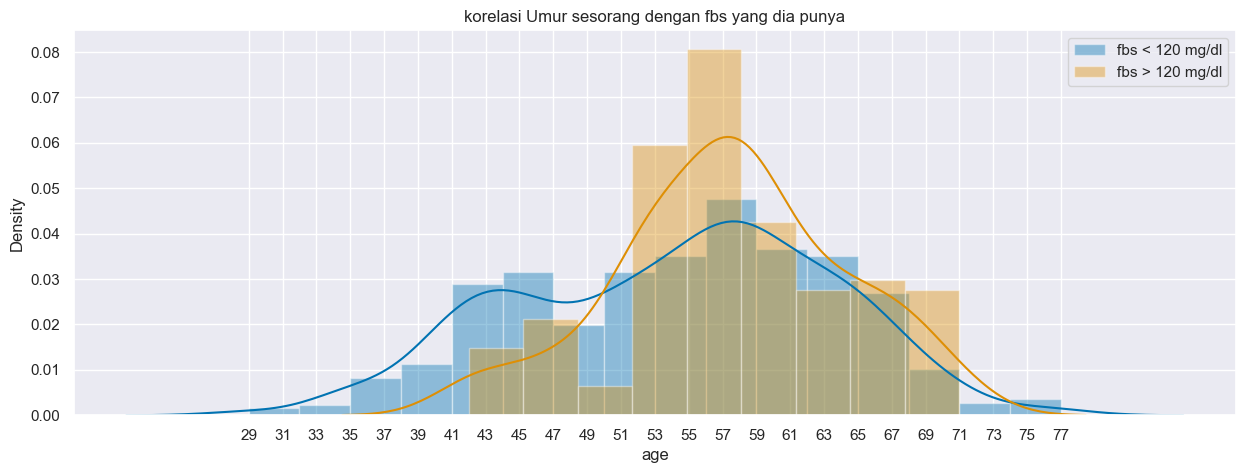

In [24]:
plt.figure(figsize=(15,5))
sns.set_palette("colorblind")
sns.distplot(df["age"][df["fbs"] == 0], label="fbs < 120 mg/dl")
sns.distplot(df["age"][df["fbs"] == 1], label="fbs > 120 mg/dl")
plt.title("korelasi Umur sesorang dengan fbs yang dia punya")
plt.xticks(range(29,79,2))
plt.legend()

Dari Histogram di atas..kita dapat melihat bahwa semakin tua seseorang, maka semakin mungkin sesorang mempunyai fasting fasting blood sugar > 120mg/dl, apalagi potensi sesorang mempunyai fasting fasting blood sugar > 120mg/dl semakin meningkat tajam ketika sesorang sudah berumur awal 50 tahun..

pihak kesehatan bisa mulai memperingatkan mitra yang sudah mulai/berada di atas umur 50 tahun untuk selalu mengecek diabetes, meningkatkan aktifitas fisik, ataupun mengelola stress untuk menghindari peningkatan lebih lanjut dari fasting fasting blood sugar guna menghindari peningkatan risiko penyakit jantung dan masalah kesehatan kardiovaskular lainnya.

2. Korelasi umur seseorang dengan tipe chest pain yang ia derita

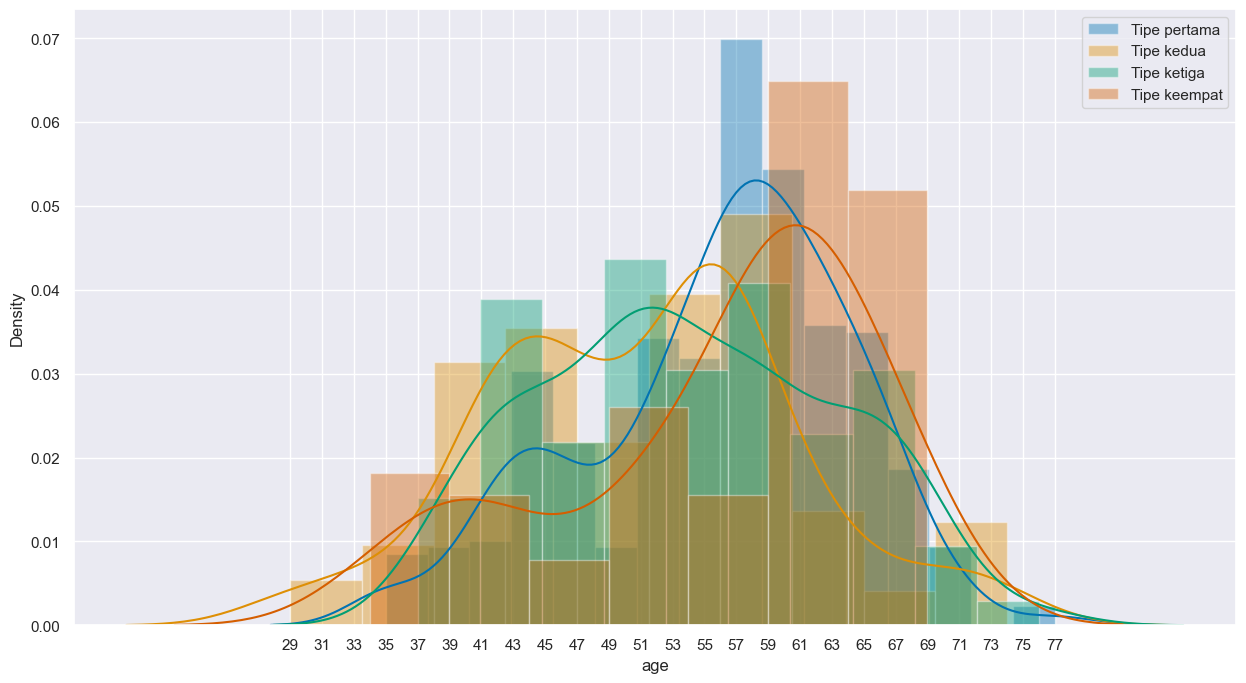

In [25]:
plt.figure(figsize=(15,8))
sns.set_palette("colorblind")
sns.distplot(df["age"][df["cp"] == 0], label="Tipe pertama")
sns.distplot(df["age"][df["cp"] == 1], label="Tipe kedua")
sns.distplot(df["age"][df["cp"] == 2], label="Tipe ketiga")
sns.distplot(df["age"][df["cp"] == 3], label="Tipe keempat")
plt.xticks(range(29,79,2))
plt.legend()

Dari histogram di atas..kita bisa melihat bahwa untuk rentang semua usia, resiko terkena chest pain akan terus meningkat meskipun variasi tipenya berbeda beda,

untuk chest pain tipe 1, terjadi lonjakan yang yang besar ketika kebanyakan subjek berada di umur 50 tahun dan akan terus meningkat resiko terkena chest pain tingkat 1 seiring bertambahnya usia, hingga puncaknya yaitu ketika kebanyak subjek berumur pertengahan 60an

untuk chest pain tipe 2, justru lonjakan kenaikan yang signifikan terjadi di umur yang lebih muda yaitu untuk kebanyakan subjek yang berumur akhir 30an, dan puncaknya adalah ketika kebanyakan subjek berumur awal 60an.

untuk chest pain tipe 3, cendrung konstan, tapi tetap ada lonjakan yang terjadi,lonjakan kenaikan yang signifikan terjadi ketika kebanyakan subjek berumur awal 40an, puncaknya ialah ketika kebanyakan subjek berumur pertengahan 50an.

untuk chest pain tipe 4, terjadi lonjakan besar ketika kebanyakan subjek berumur awal 50an, puncaknya ialah ketika kebanyakan subjek berumur awal 60an

dari analisis di atas..saya menyarankan untuk pihak kesehatan mulai memperhatikan mitra yang berumur awal 30an dan keatasnya, karena resiko chest pain terjadi meningkat drastis seiring meningkatnya umur seseorang, pihak kesehatan juga bisa memberikan program manajemen stres dan layanan kesehatan jantung yang spesifik untuk kelompok usia tertentu agar dapat menurunkan resiko sesorang menderita chest pain.

3. korelasi umur seseorang dengan nilai restcg (resting electrocardiographic results) yang ia punya

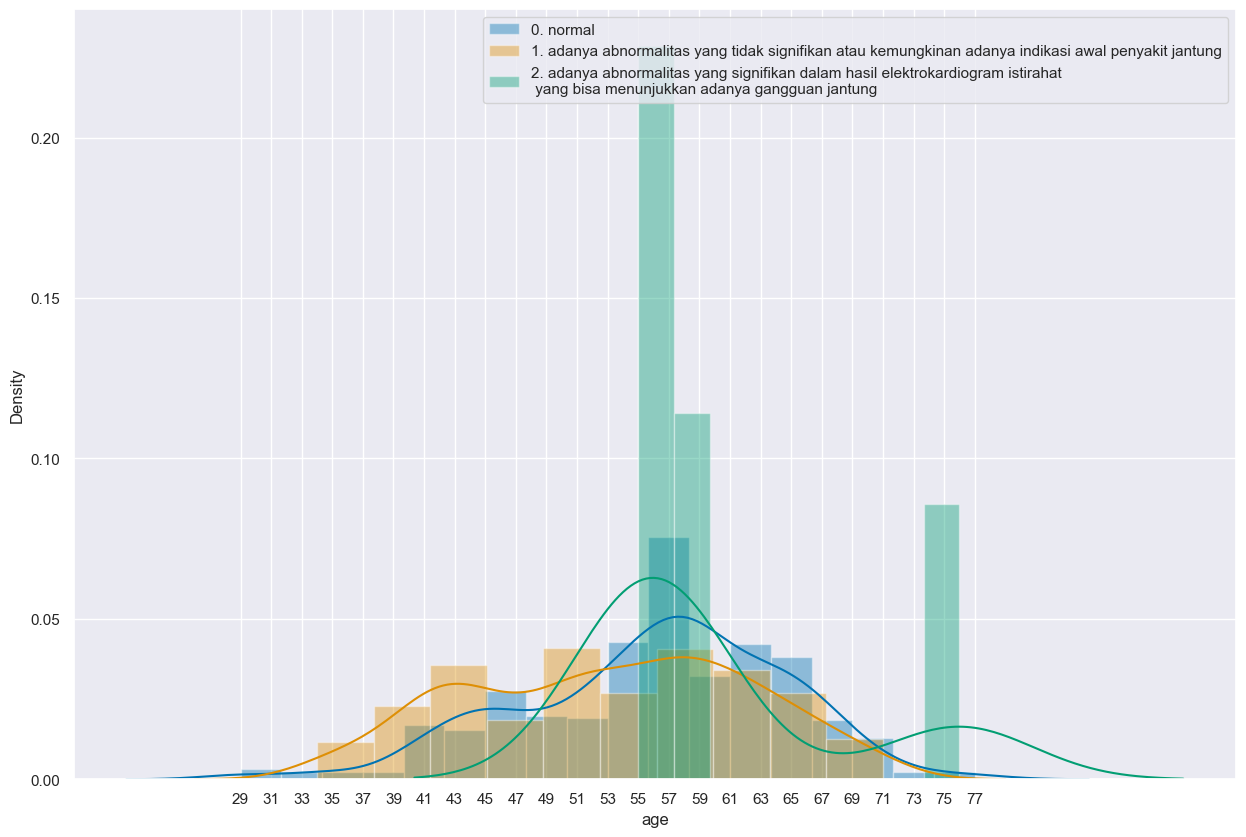

In [26]:
plt.figure(figsize=(15,10))
sns.set_palette("colorblind")
sns.distplot(df["age"][df["restecg"] == 0], label="0. normal")
sns.distplot(df["age"][df["restecg"] == 1], label="1. adanya abnormalitas yang tidak signifikan atau kemungkinan adanya indikasi awal penyakit jantung")
sns.distplot(df["age"][df["restecg"] == 2], label="2. adanya abnormalitas yang signifikan dalam hasil elektrokardiogram istirahat \n yang bisa menunjukkan adanya gangguan jantung")
plt.xticks(range(29,79,2))
plt.legend()

dari histogram di atas..kita bisa melihat ada perbedaan yang lumayan pada umur dan nilai dari resting electrocardiographic results yang seorang subjek punya

kebanyakan subjek menunjukan nilai 0 dan 1 dari rentang umur 29 sampai akhir 77, tapi pada nilai 1, dimana ini menunjukan adanya abnormalitas yang tidak signifikan atau kemungkinan adanya indikasi awal penyakit jantung, bisa dimulai dari ketika orang masih muda sekalipun, sehingga ini menunjukan bahwa umur tidak menjadi patokan yang pasti untuk apakah sesorang menunjukkan adanya abnormalitas yang tidak signifikan atau kemungkinan adanya indikasi awal penyakit jantung

berbeda dengan nilai 2, yang muncul pada kebanyakan subjek berumur awal 40an dan kemudian melonjak hingga puncaknya pada kebanyakan subjek berumur akhir 60an, nilai 2 ini menunjukkan bahwa seorang individu mempunyai abnormalitas yang signifikan dalam hasil elektrokardiogram istirahat yang bisa menunjukkan adanya gangguan jantung

dari analisis ini, saya menyarankan untuk pihak kesehatan bisa mulai memantau, menasehati ataupun mendorong mitra dari segala kalangan(mengingakt hasil resting electrocardiographic results yang diatas normal bisa terjadi pada seluruh kalangan umur)untuk hidup sehat seperti perbanyak aktifitas fisik, mulai berhenti merokok, melakukan diet yang sehat terutama untuk mitra yang memiliki berat badan berlebih, serta memanajemen stress karena Dengan menerapkan pola hidup sehat, seseorang dapat secara signifikan mempengaruhi hasil resting electrocardiographic results dan mengurangi risiko terkena berbagai kondisi jantung..dan juga untuk pasien dengan umur awal 40an, berikan saran untuk selalu konsultasi dengan dokter spesialis jantung guna pemantauan lebih lanjut sehingga dokter dapat memberikan saran medis yang dapat menurunkan resiko kenaikan nilai pada resting electrocardiographic results.

4. korelasi umur sesorang dengan exang (exercise induced angina)

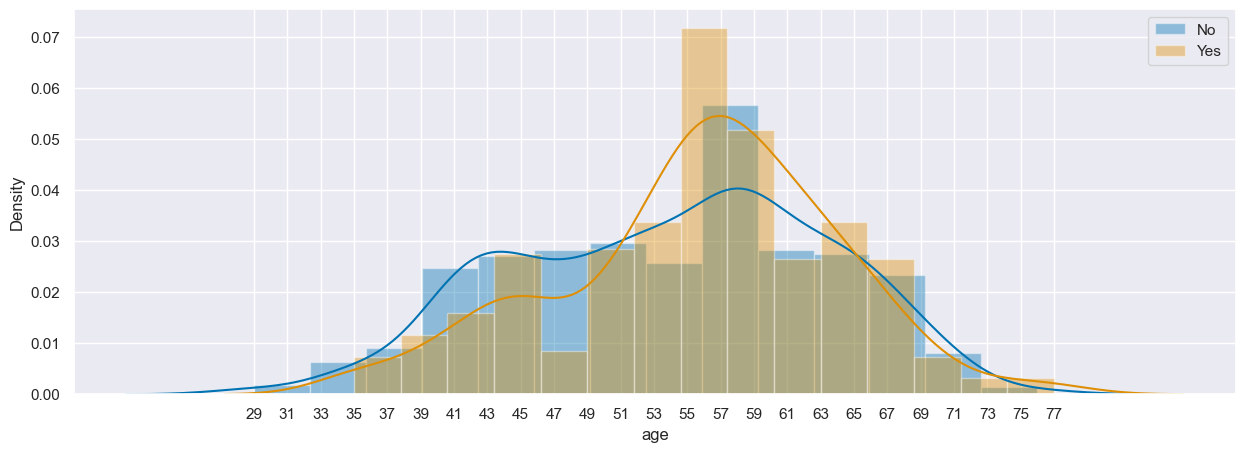

In [27]:
plt.figure(figsize=(15,5))
sns.set_palette("colorblind")
sns.distplot(df["age"][df["exang"] == 0], label="No")
sns.distplot(df["age"][df["exang"] == 1], label="Yes")
plt.xticks(range(29,79,2))
plt.legend()

dari hstogram di atas..kita bisa melihat bahwa angina pectoris yang dipicu oleh aktivitas fisik lebih mungkin terjadi semakin tua umur sesorang, jika dilihat pada histogram, maka angina pectoris yang dipicu oleh aktivitas fisik akan selalu naik ke atas, angina pectoris yang dipicu oleh aktivitas fisik menyebar rata dan terus naik di dalam histogram.

saya menyarankan tenaga kesehatan untuk selalu memantau mitra yang berobat jikalau mengalami tanda-tanda angina pectoris yang dipicu oleh aktivitas fisik, harus dianalisis lebih jauh kembali dikarenakan angina pectoris yang dipicu oleh aktivitas fisik merupakan salah satu faktor gejala umum dari penyakit jantung koroner, apalagi untuk mitra diatas umur 50 tahun mendapatkan prioritas lebih tinggi.

5. korelasi umur seseorang dengan nilai Slope of the peak exercise ST segment yang dimilikinya

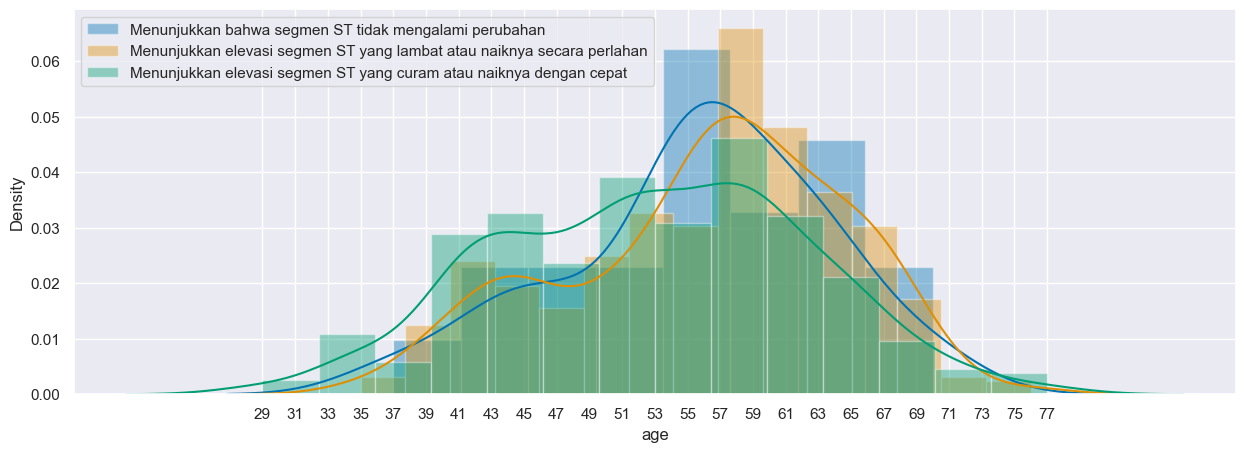

In [28]:
plt.figure(figsize=(15,5))
sns.set_palette("colorblind")
sns.distplot(df["age"][df["slope"] == 0], label="Menunjukkan bahwa segmen ST tidak mengalami perubahan")
sns.distplot(df["age"][df["slope"] == 1], label="Menunjukkan elevasi segmen ST yang lambat atau naiknya secara perlahan")
sns.distplot(df["age"][df["slope"] == 2], label="Menunjukkan elevasi segmen ST yang curam atau naiknya dengan cepat")
plt.xticks(range(29,79,2))
plt.legend()

dari histogram diatas..kita dapat melihat bahwa Slope of the peak exercise ST segment yang nilainya 1 dan 2 meningkat secara konsisten dari awal sebaran umur subjek, mayoritas nilai 1 dan 2 berada di pertengahan umur 50 hingga awal umur 70, ini menandakan sesorang diatas umur 50 memberikan nilai Slope of the peak exercise ST segment yang lebih berisiko.

saran kepada tenaga medis untuk lebih memperhatikan seluruh mitra, mulai dari umur 50 tahun ke atas untuk menjadi prioritas dikarenakan nilai Slope of the peak exercise ST segment yang jelek bisa menandakan seseorang mengalami Penyakit Jantung Koroner, Iskemia Miokard dan penyakit terkait jantung lainnya.

6. korelasi umur seseorang dengan hasil tes number of major vessels

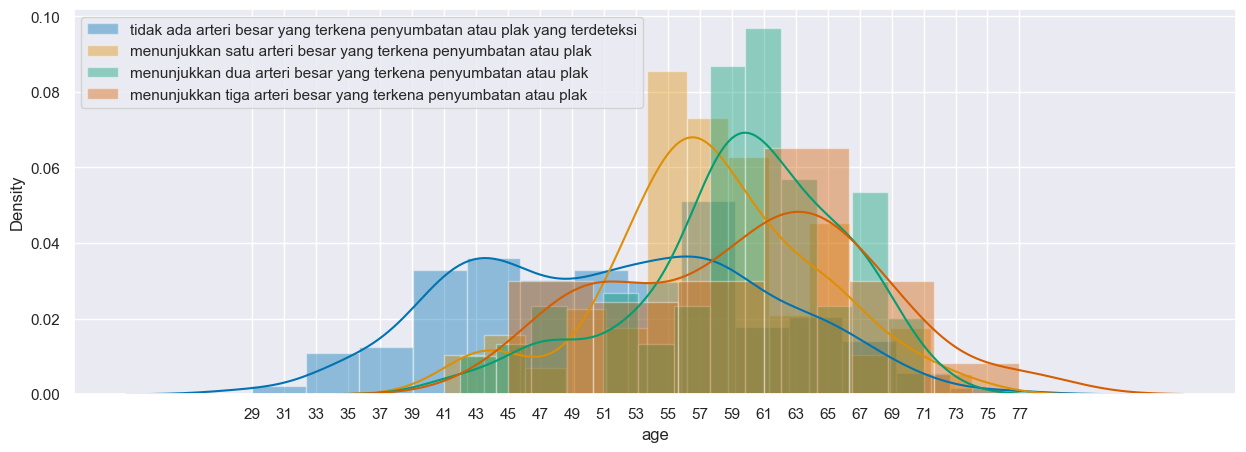

In [29]:
plt.figure(figsize=(15,5))
sns.set_palette("colorblind")
sns.distplot(df["age"][df["ca"] == 0], label="tidak ada arteri besar yang terkena penyumbatan atau plak yang terdeteksi")
sns.distplot(df["age"][df["ca"] == 1], label="menunjukkan satu arteri besar yang terkena penyumbatan atau plak")
sns.distplot(df["age"][df["ca"] == 2], label="menunjukkan dua arteri besar yang terkena penyumbatan atau plak")
sns.distplot(df["age"][df["ca"] == 3], label="menunjukkan tiga arteri besar yang terkena penyumbatan atau plak")
plt.xticks(range(29,79,2))
plt.legend()

dari histogram diatas, nampak bahwa pada subjek tes umur awal, yaitu untuk umur 29 sampai kisaran 43 tahun, mayoritas tidak meanmpakan adanya arteri besar yang terkena penyumbatan atau plak yang terdeteksi pada tes number of major vessels, semua itu kemudian berubah di beberapa subjek di kisaran umur 43, jumlah subjek yang hasil tesnya jelek mulai meningkat, hingga puncaknya adalah pada golongan yang menunjukkan 2 dan 3 arteri besar yang terkena penyumbatan atau plak berada di kisaran umur 50an sampai akhir 70an.

semakin banyak arteri besar yang nampak dari tes number of major vessels, semakin meningkatkan risiko komplikasi dan kerusakan jantung pada seseorang, karena itu saya menyarankan pada tenaga medis untuk melakukan cek lebih dalam dan lebih lanjut kepada mitra yang mununjukkan adanya arteri besar yang terkena penyumbatan atau plak, karena itu bisa berakibat fatal kedepannya

7. korelasi umur sesorang dengan konsentrasi thalium

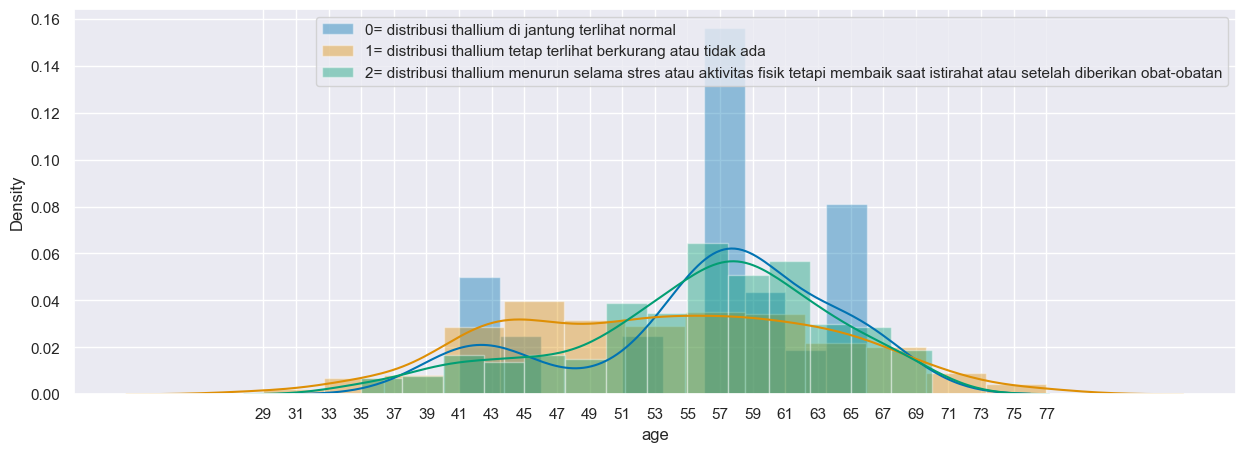

In [30]:
plt.figure(figsize=(15,5))
sns.set_palette("colorblind")
sns.distplot(df["age"][df["thal"] == 1], label="0= distribusi thallium di jantung terlihat normal")
sns.distplot(df["age"][df["thal"] == 2], label="1= distribusi thallium tetap terlihat berkurang atau tidak ada")
sns.distplot(df["age"][df["thal"] == 3], label="2= distribusi thallium menurun selama stres atau aktivitas fisik tetapi membaik saat istirahat atau setelah diberikan obat-obatan")
plt.xticks(range(29,79,2))
plt.legend()

pada histogram di atas..terlihat rentang umur subjek yang distribusi thaliumnya berada pada nilai 1 dan 2 bahkan dimulai dari umur 30an, hingga puncaknnya pada pertengahan umur 50an

saran saya kepada tenaga medis, setiap nilai distribusi thalium memiliki penangganan berbeda, untuk yang bernilai 1, harus dilakukan penangganan dan pengawasan dari doketer spesialis karena mitra dengan fixed defect mungkin memiliki kerusakan otot jantung yang permanen atau bekas infark miokard (serangan jantung sebelumnya) di area tersebut, perlu juga dilakuakn perubahan gaya hidup menjadi lebih sehat agar bisa kembali normal.

untuk yang punya nilai 2, mitra harus melakukan serangkaian tes dengan dokter spesialis jantung untuk menentukan penyebab reversible defect. Ini mungkin melibatkan tes tambahan seperti tes stres tambahan, elektrokardiogram (EKG), echocardiogram, atau angiografi koroner untuk mengevaluasi aliran darah ke jantung, Jika reversible defect menunjukkan iskemia (kurangnya aliran darah yang reversibel) selama stres, maka langkah-langkah pengobatan untuk mengurangi risiko iskemia lebih lanjut mungkin diperlukan, tetap juga lakukan pantauan berkala untuk mitra dengan nilai 2.

8. korelasi umur subjek tes dengan apakah subjek terkena penyakit jantung atau tidak

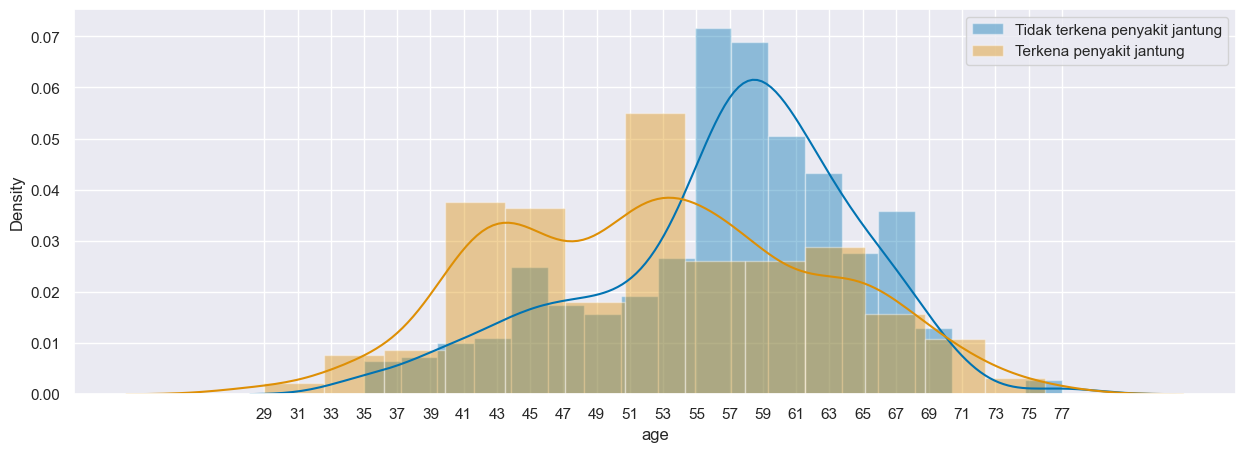

In [31]:
plt.figure(figsize=(15,5))
sns.set_palette("colorblind")
sns.distplot(df["age"][df["target"] == 0], label="Tidak terkena penyakit jantung")
sns.distplot(df["age"][df["target"] == 1], label="Terkena penyakit jantung")
plt.xticks(range(29,79,2))
plt.legend()

Dari histogram di atas..meskipun dari analisis kita kebelakang mayoritas subjek bermasalah berada pada umur 50an, tapi pada kenyataannya sebaran untuk penderita sakit jantung tersebar merata di segala umur, ini bisa terjadi dikarenakan faktor bahwa penyakit jantung itu sendiri banyak jenisnya, jadi kita tidak mengetahui jenis tertentu pada seorang subjek tes.

dari semua analisis di atas, saya bisa simpulkan sebagai demikian:

Korelasi antara Usia dan Fasting Blood Sugar (FBS):
- Semakin tua seseorang, semakin mungkin memiliki FBS > 120mg/dl, dengan lonjakan signifikan pada awal 50-an.
Rekomendasi: 
- Perhatikan mitra yang berusia di atas 50 tahun untuk pemeriksaan diabetes dan dorong gaya hidup sehat untuk mengurangi risiko penyakit jantung.

Korelasi antara Usia dan Tipe Chest Pain:
- Resiko terkena chest pain meningkat seiring bertambahnya usia, dengan pola yang berbeda untuk masing-masing tipe chest pain.
Rekomendasi: 
- Berikan perhatian khusus pada mitra yang berusia di atas 30 tahun dan lakukan manajemen stres serta layanan kesehatan jantung yang spesifik untuk kelompok usia tertentu.

Korelasi antara Usia dan Resting Electrocardiographic Results (RESTCG):
- Subjek dapat menunjukkan hasil yang abnormal pada usia muda, tetapi puncak nilai yang lebih tinggi terjadi pada usia lanjut.
Rekomendasi: 
- Pantau secara rutin mitra yang menunjukkan nilai RESTCG di atas normal, dan berikan saran medis yang sesuai untuk mengurangi risiko penyakit jantung.

Korelasi antara Usia dan Exercise Induced Angina (EXANG):
- Angina yang dipicu oleh aktivitas fisik lebih mungkin terjadi seiring bertambahnya usia.
Rekomendasi: 
- Perhatikan tanda-tanda angina pectoris pada mitra yang lebih tua, dan lakukan analisis lebih lanjut jika diperlukan.

Korelasi antara Usia dan Slope of the Peak Exercise ST Segment:
- Nilai yang tidak baik pada Slope of the Peak Exercise ST Segment lebih mungkin terjadi pada usia lebih tua.
Rekomendasi: 
- Berikan perhatian khusus pada mitra yang berusia di atas 50 tahun untuk deteksi dini penyakit jantung.

Korelasi antara Usia dan Number of Major Vessels:
- Jumlah arteri besar yang terkena penyumbatan atau plak meningkat seiring bertambahnya usia.
Rekomendasi: 
- Lakukan evaluasi lebih lanjut dan pantau secara intensif pada mitra dengan indikasi arteri besar yang terkena penyumbatan atau plak.

Korelasi antara Usia dan Thalium Concentration:
- Nilai Thalium Concentration yang lebih rendah cenderung terjadi pada usia muda, tetapi puncaknya terjadi pada pertengahan umur.
Rekomendasi: 
- Berikan penanganan medis yang sesuai sesuai dengan nilai Thalium Concentration.

Korelasi antara Usia dan Penyakit Jantung:
- Meskipun risiko penyakit jantung meningkat seiring bertambahnya usia, distribusinya tidak merata dan penyakit jantung dapat terjadi pada berbagai kelompok usia.
Rekomendasi: 
- Berikan pendekatan pencegahan dan pengelolaan penyakit jantung kepada semua kelompok usia.

Korelasi apakah seseorang terkena penyakit jantung atau tidak(target) dengan faktor dari kolom numerik

1. apakah seseorang terkena penyakit jantung atau tidak dan nilai Resting blood pleasure

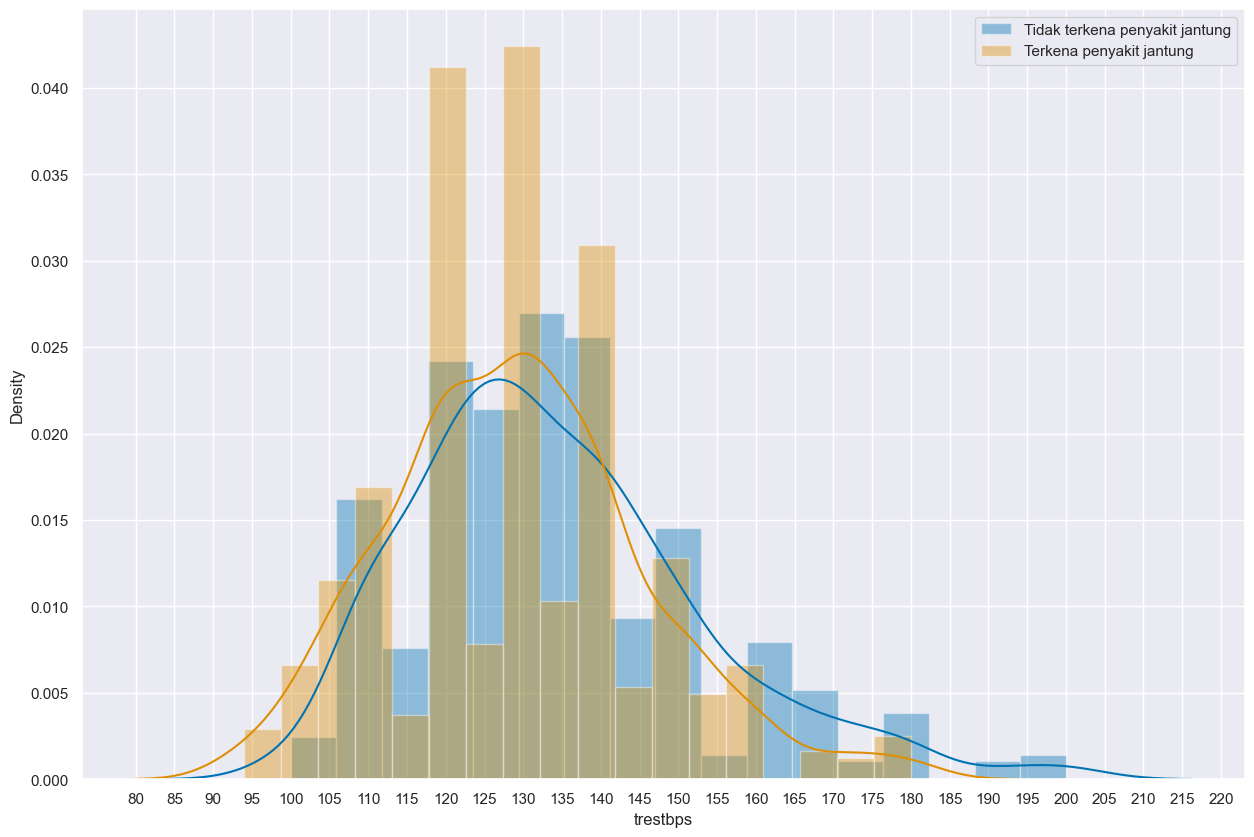

In [32]:
plt.figure(figsize=(15,10))
sns.set_palette("colorblind")
sns.distplot(df["trestbps"][df["target"] == 0], label="Tidak terkena penyakit jantung")
sns.distplot(df["trestbps"][df["target"] == 1], label="Terkena penyakit jantung")
plt.xticks(range(80,222,5))
plt.legend()

Berdasarkan histogram di atas..kita dapat menarik kesimpulan sementara bahwasan nya nilai Resting blood pleasure dan apakah sesorang terkena penyakit jantung tidaklah terlalu berhubungan, ini bisa dilihat dengan fakta bahwa seseorang yang terkena penyakit jantung maupun tidak terkena penyakit KDE nya berdekatan satu sama lain.

2. apakah seseorang terkena penyakit jantung atau tidak dan nilai serum cholestoral in mg/dl

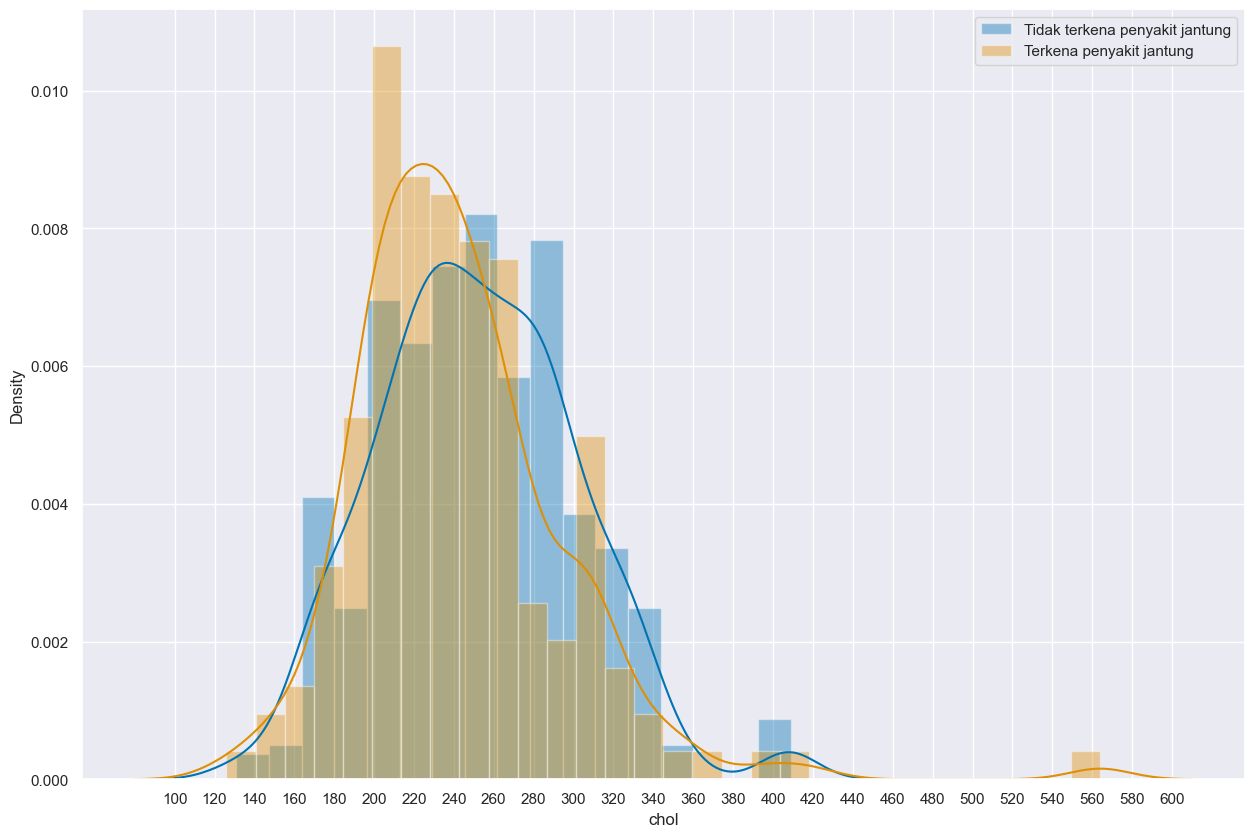

In [33]:
plt.figure(figsize=(15,10))
sns.set_palette("colorblind")
sns.distplot(df["chol"][df["target"] == 0], label="Tidak terkena penyakit jantung")
sns.distplot(df["chol"][df["target"] == 1], label="Terkena penyakit jantung")
plt.xticks(range(100,610,20))
plt.legend()

Berdasarkan histogram di atas..kita dapat menarik kesimpulan sementara bahwasan nya nilai serum cholestoral in mg/dl dan apakah sesorang terkena penyakit jantung tidaklah terlalu berhubungan, ini bisa dilihat dengan fakta bahwa seseorang yang terkena penyakit jantung maupun tidak terkena penyakit KDE nya berdekatan satu sama lain.

3. apakah seseorang terkena penyakit jantung atau tidak dan nilai maximum heart rate achieved

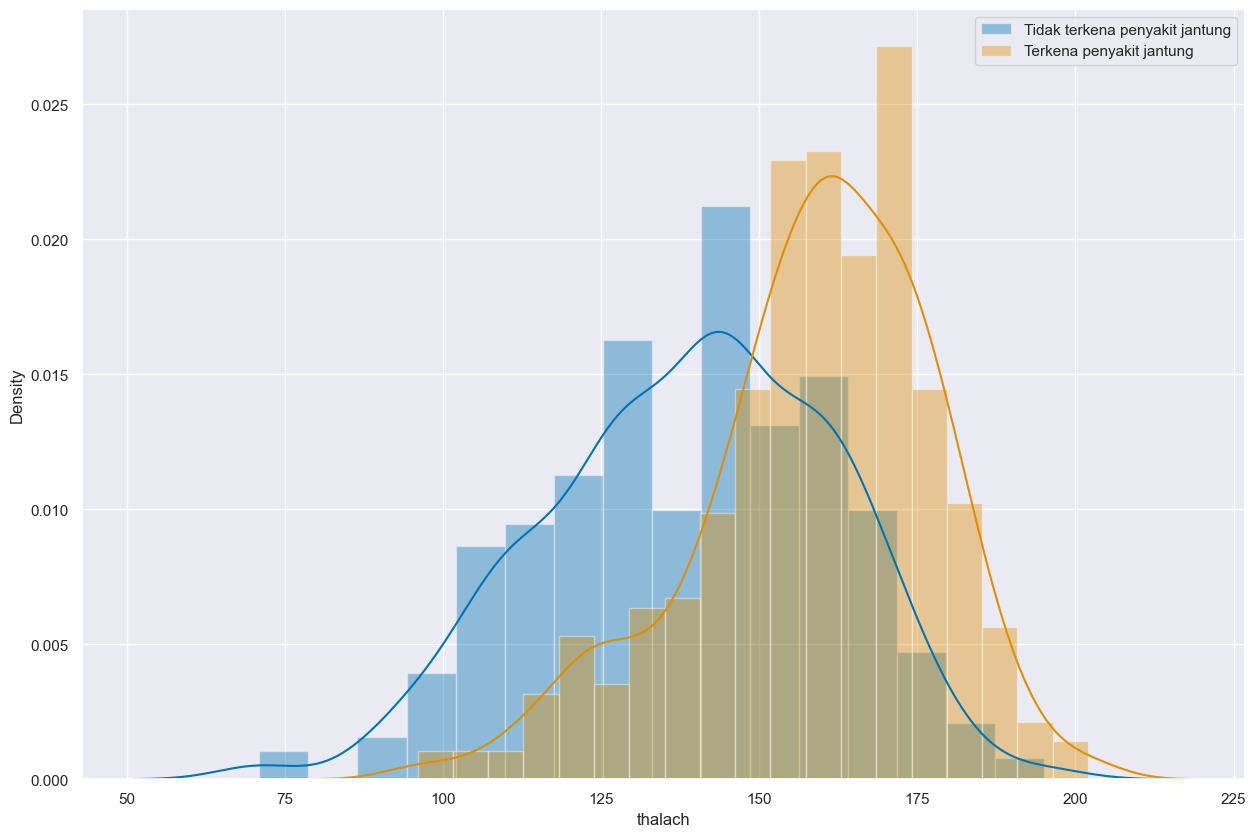

In [34]:
plt.figure(figsize=(15,10))
sns.set_palette("colorblind")
sns.distplot(df["thalach"][df["target"] == 0], label="Tidak terkena penyakit jantung")
sns.distplot(df["thalach"][df["target"] == 1], label="Terkena penyakit jantung")
#plt.xticks(range(80,222,5))
plt.legend()

Dari histogram di atas..kita bisa menarik kesimpulan sementara bahwasannya subjek tes yang memiliki maximum heart rate achieved diatas 150 diatas berkemungkinan lebih besar dalam terkena penyakit jantung, karena secara ilmiah juga disebutkan bahwa jika maximum heart rate achieved diatas 150, ini menunjukkan kondisi di mana jantungnya terlalu dipacu atau adanya tekanan fisik yang terlalu besar.

saran untuk tenaga medis..jikalau seorang mitra memiliki maximum heart rate achieved di atas 150, maka bisa dilakukan penangganan lebih lanjut seperti merekomendasikan lebih banyak istirahat, perubahan gaya hidup seperti mengurangi rokok atau alkohol, dan bisa juga berkonsultasi ke dokter untuk penangganan lebih lanjut.

4. apakah seseorang terkena penyakit jantung atau tidak dan nilai ST depression induced by exercise relative to rest

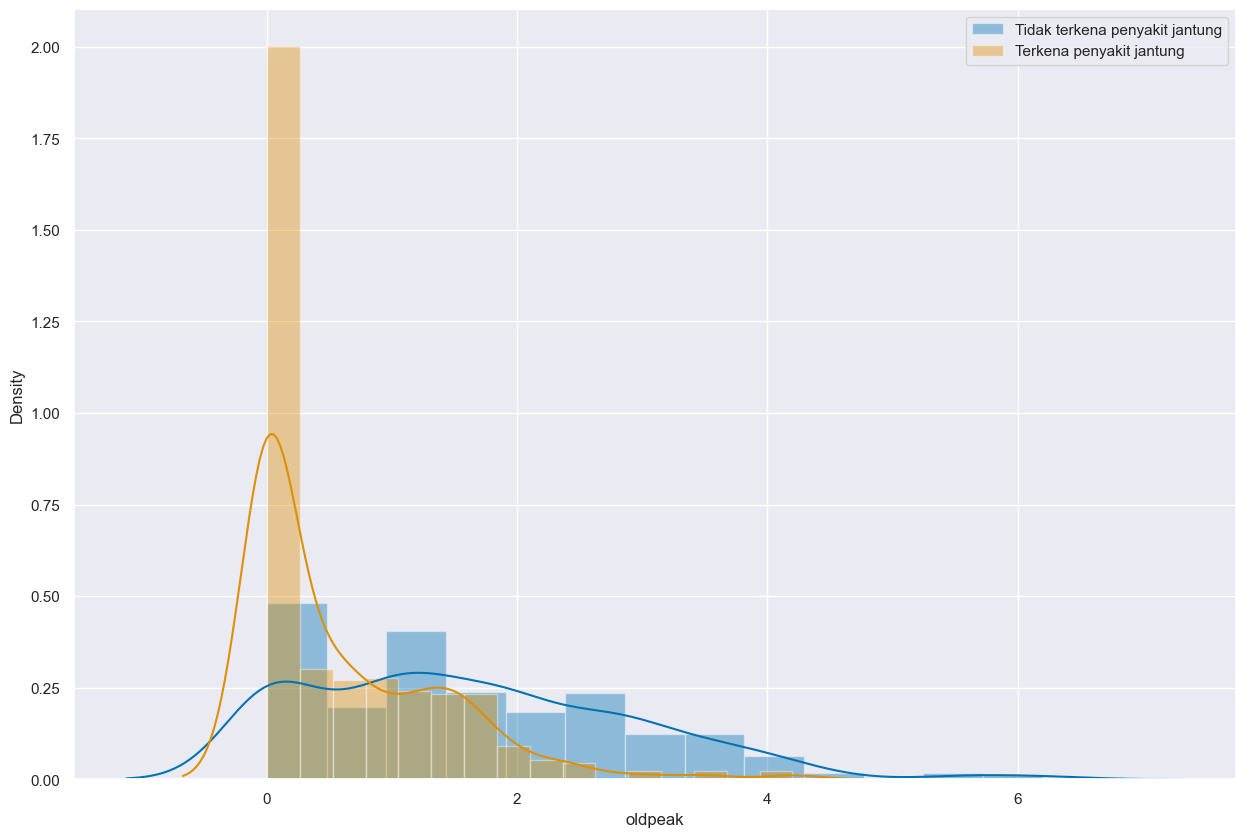

In [35]:
plt.figure(figsize=(15,10))
sns.set_palette("colorblind")
sns.distplot(df["oldpeak"][df["target"] == 0], label="Tidak terkena penyakit jantung")
sns.distplot(df["oldpeak"][df["target"] == 1], label="Terkena penyakit jantung")
#plt.xticks(range(80,222,5))
plt.legend()

Berdasarkan histogram di atas..kita dapat menarik kesimpulan sementara bahwasannya subjek tes yang memiliki ST depression induced by exercise relative to rest di nilai 0 berkemungkinan tinggi terkena serangan jantung.

 Korelasi apakah seseorang terkena penyakit jantung atau tidak dengan faktor dari kolom kategorikal

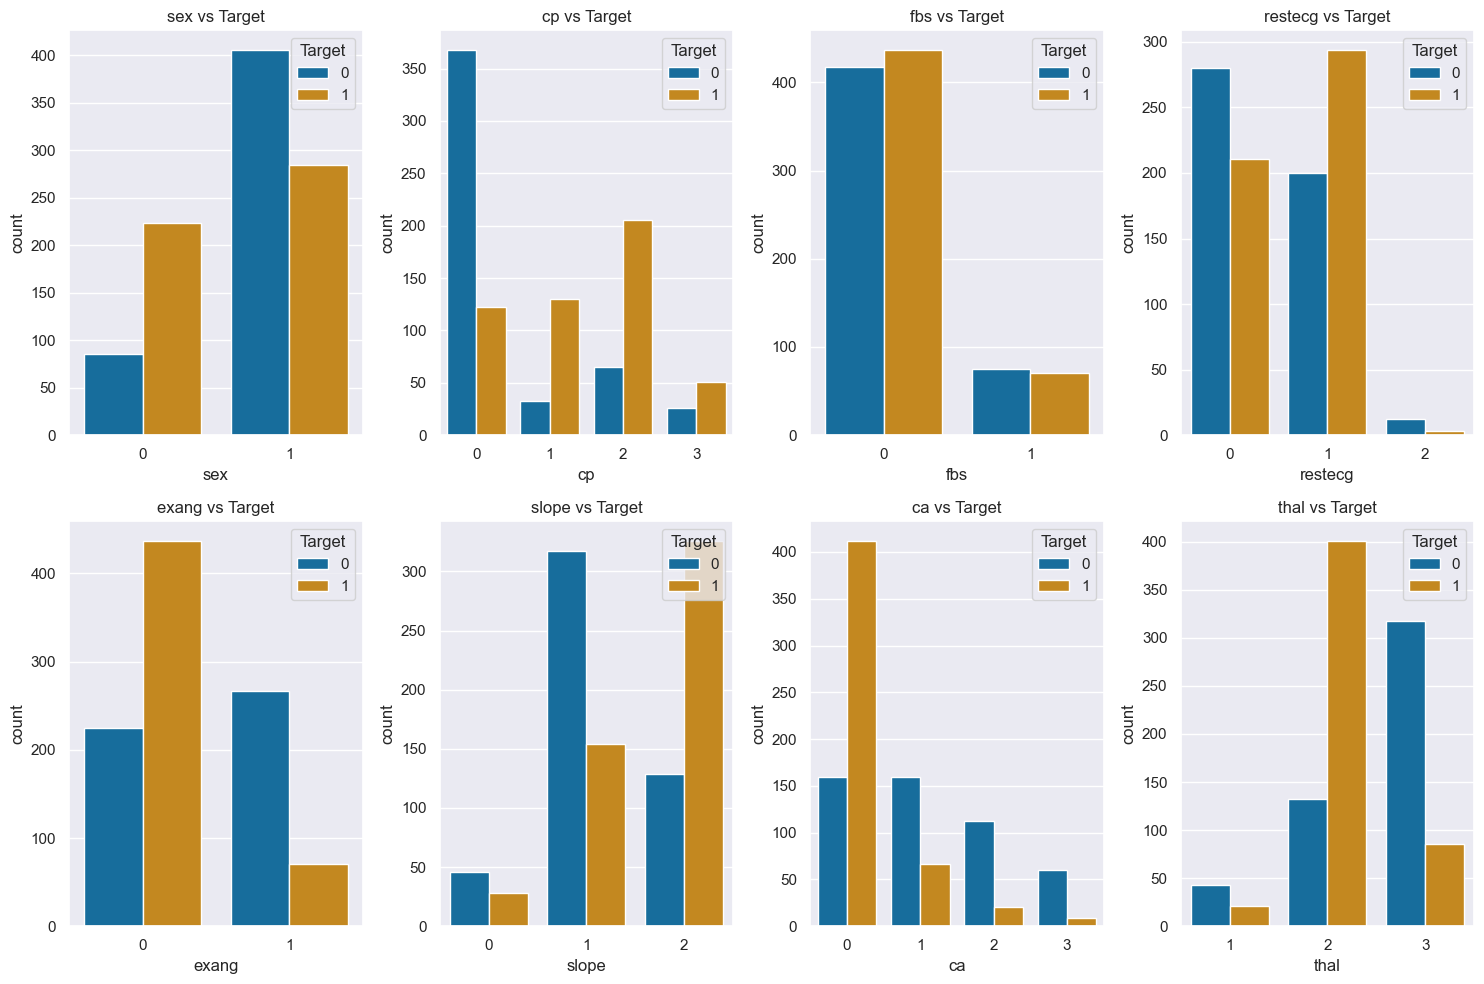

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_var = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

fig, axes = plt.subplots(2, 4, figsize=(15, 10))

for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(x=cat, data=df, hue="target", ax=ax)
    ax.set_title(f"{cat} vs Target")
    ax.legend(title="Target", loc="upper right")

plt.tight_layout()
plt.show()

dari visulaisasi di atas kita bisa menarik beberapa kesimpulan sementara.

1. jika membandingkan apakah seseorang terkena penyakit jantung atau tidak dengan jenis kelaminnya..dapat kita lihat bahwa laki-laki lebih besar berpeluang dalam terkena penyakit jantung ketimbang perempuan

2. jika membandingkan apakah seseorang terkena penyakit jantung atau tidak dengan tipe chest pain..dapat kita simpulkan bahwa subjek tes yang terkena chest pain tipe 2 lebih besar kemungkinannya terkena penyakit jantung

3. jika membandingkan apakah seseorang terkena penyakit jantung atau tidak dengan fasting blood sugar..tidak bisa kita lihat korelasinya karena nilai di mana fbs < 120 mg/dl dan fbs < 120 mg/dl diagramnya sama

4. jika membandingkan apakah seseorang terkena penyakit jantung atau tidak dengan resting electrocardiographic results..maka subjek tes yang mendapat nilai 1 di resting electrocardiographic results, dimana ini berarti adanya abnormalitas yang tidak signifikan atau kemungkinan adanya indikasi awal penyakit jantung, besar ternyata mereka terkena penyakit jantung sungguhan

5. jika membandingkan apakah seseorang terkena penyakit jantung atau tidak dengan exercise induced angina...maka subjek tes yang exercise induced angina nya Yes, atau dengan kata lain subjek tes yang tidak mengalami angina pectoris yang dipicu oleh aktivitas fisik lebih banyak yang mengalami sakit jantung

6. jika membandingkan apakah seseorang terkena penyakit jantung atau tidak dengan Slope of the peak exercise ST segment..maka orang yang menunjukkan nilai 1, atau dengan kata lain Menunjukkan elevasi segmen ST yang curam atau naiknya dengan cepat lebih banyak yang terkena penyakit jantung

7. jika membandingkan apakah seseorang terkena penyakit jantung atau tidak dengan number of major vessels..maka orang yang menunjukkan nilai 0, atau dengan kata lain menunjukkan tidak ada arteri besar yang terkena penyumbatan atau plak yang terdeteksi lebih banyak terkena penyakit jantung

8. jika membandingkan apakah seseorang terkena penyakit jantung atau tidak dengan konsentrasi thalium..maka orang yang menunnjukkan nilai 1, atau dengan kata lain menunjukkan distribusi thallium tetap terlihat berkurang atau tidak ada, lebih banyak yang terkena penyakit jantung

In [37]:
kategorikal = df[["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]]

In [38]:
for column in kategorikal:
    cross_tab=pd.crosstab(df[column],df["target"],normalize="index")
    print(f"Cross-tabulation untuk {column} vs target:")
    print(cross_tab)
    print("\n")

Cross-tabulation untuk sex vs target:
target         0         1
sex                       
0       0.278317  0.721683
1       0.587554  0.412446


Cross-tabulation untuk cp vs target:
target         0         1
cp                        
0       0.751020  0.248980
1       0.202454  0.797546
2       0.240741  0.759259
3       0.337662  0.662338


Cross-tabulation untuk fbs vs target:
target         0         1
fbs                       
0       0.488290  0.511710
1       0.513699  0.486301


Cross-tabulation untuk restecg vs target:
target          0         1
restecg                    
0        0.570265  0.429735
1        0.404858  0.595142
2        0.800000  0.200000


Cross-tabulation untuk exang vs target:
target         0         1
exang                     
0       0.339879  0.660121
1       0.789941  0.210059


Cross-tabulation untuk slope vs target:
target         0         1
slope                     
0       0.621622  0.378378
1       0.673036  0.326964
2       0.283516  0.7

Membaca korelasi antara kolom dengan heatmap

<Axes: >

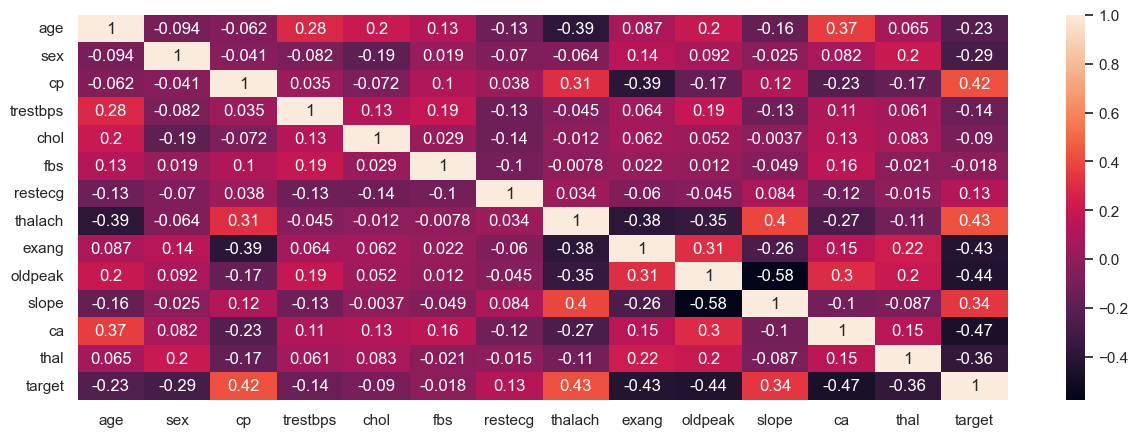

In [39]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

ternyata kolom target(penuentu sesorang terkena penyakit jantung atau tidak) mempunyai korelasi yang kuat dengan kolom slope(Slope of the peak exercise ST segment), thalach(maximum heart rate achieved), dan(chest pain)

hal ini bisa menjadi rekomendasi kuat untuk tenaga medis dimana mereka bisa lebih memperhatikan ke 3 kondisi itu untuk menentukan dan memprediksi kemungkinan seseorang terkena penyakit jantung kedepannya.

# **Feature Engineering**

---

In [40]:
pd.set_option("display.max_colwidth",None)

1. klasifikasi rentang umur

saya membuat fitur baru klasifikasi rentang umur sesuai dengan link ini

https://gaya.tempo.co/read/1724197/kategori-umur-balita-remaja-dan-dewasa-menurut-kemenkes-jangan-salah

In [41]:
bins = [0, 1, 6, 11, 19, 45, 60, 100]
labels = ['Balita', 'Prasekolah', 'Anak', 'Remaja', 'Dewasa', 'Pra Lanjut Usia', 'Lanjut Usia']

df['kategori_umur'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [42]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,kategori_umur
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Pra Lanjut Usia
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Pra Lanjut Usia
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Lanjut Usia
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Lanjut Usia
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Lanjut Usia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,Pra Lanjut Usia
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,Lanjut Usia
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,Pra Lanjut Usia
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,Pra Lanjut Usia


In [43]:
df = pd.get_dummies(df, columns=["kategori_umur"])

In [44]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,target,kategori_umur_Balita,kategori_umur_Prasekolah,kategori_umur_Anak,kategori_umur_Remaja,kategori_umur_Dewasa,kategori_umur_Pra Lanjut Usia,kategori_umur_Lanjut Usia
0,52,1,0,125,212,0,1,168,0,1.0,...,2,3,0,0,0,0,0,0,1,0
1,53,1,0,140,203,1,0,155,1,3.1,...,0,3,0,0,0,0,0,0,1,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,3,0,0,0,0,0,0,0,1
3,61,1,0,148,203,0,1,161,0,0.0,...,1,3,0,0,0,0,0,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,3,2,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,...,0,2,1,0,0,0,0,0,1,0
1021,60,1,0,125,258,0,0,141,1,2.8,...,1,3,0,0,0,0,0,0,0,1
1022,47,1,0,110,275,0,0,118,1,1.0,...,1,2,0,0,0,0,0,0,1,0
1023,50,0,0,110,254,0,0,159,0,0.0,...,0,2,1,0,0,0,0,0,1,0


2. fitur kolestrol level

ini menggunakan rentang umur dan chol

sumber https://www.healthline.com/health/high-cholesterol/levels-by-age#:~:text=The%20Recommended%20Cholesterol%20Levels%20by%20Age&text=Recommended%20total%20cholesterol%20levels%20are,170%20mg%2FdL%20for%20children.

In [45]:
def level_kolestrol(row):
    age = row["age"]
    chol = row["chol"]
    if age < 19:
        if chol < 170:
            return "Normal"
        else:
            return "Tidak Normal"
    else:
        if chol < 200:
            return "Normal"
        else:
            return "Tidak Normal"
df["level_kolestrol"] = df.apply(level_kolestrol, axis=1)

In [46]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,kategori_umur_Balita,kategori_umur_Prasekolah,kategori_umur_Anak,kategori_umur_Remaja,kategori_umur_Dewasa,kategori_umur_Pra Lanjut Usia,kategori_umur_Lanjut Usia,level_kolestrol
0,52,1,0,125,212,0,1,168,0,1.0,...,3,0,0,0,0,0,0,1,0,Tidak Normal
1,53,1,0,140,203,1,0,155,1,3.1,...,3,0,0,0,0,0,0,1,0,Tidak Normal
2,70,1,0,145,174,0,1,125,1,2.6,...,3,0,0,0,0,0,0,0,1,Normal
3,61,1,0,148,203,0,1,161,0,0.0,...,3,0,0,0,0,0,0,0,1,Tidak Normal
4,62,0,0,138,294,1,1,106,0,1.9,...,2,0,0,0,0,0,0,0,1,Tidak Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,...,2,1,0,0,0,0,0,1,0,Tidak Normal
1021,60,1,0,125,258,0,0,141,1,2.8,...,3,0,0,0,0,0,0,0,1,Tidak Normal
1022,47,1,0,110,275,0,0,118,1,1.0,...,2,0,0,0,0,0,0,1,0,Tidak Normal
1023,50,0,0,110,254,0,0,159,0,0.0,...,2,1,0,0,0,0,0,1,0,Tidak Normal


In [47]:
df = pd.get_dummies(df,columns=["level_kolestrol"])

In [48]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,kategori_umur_Balita,kategori_umur_Prasekolah,kategori_umur_Anak,kategori_umur_Remaja,kategori_umur_Dewasa,kategori_umur_Pra Lanjut Usia,kategori_umur_Lanjut Usia,level_kolestrol_Normal,level_kolestrol_Tidak Normal
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,0,0,1
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,0,1,1,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,0,1,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,...,1,0,0,0,0,0,1,0,0,1
1021,60,1,0,125,258,0,0,141,1,2.8,...,0,0,0,0,0,0,0,1,0,1
1022,47,1,0,110,275,0,0,118,1,1.0,...,0,0,0,0,0,0,1,0,0,1
1023,50,0,0,110,254,0,0,159,0,0.0,...,1,0,0,0,0,0,1,0,0,1


3. Fitur blood pleasure level

ini adalah kolom trestbps yang dikategorikan berdasarkan umur

sumbernya ialah:
https://www.emedicinehealth.com/what_is_a_normal_blood_pressure_range_by_age/article_em.htm

di sini saya menggangap bahwa resting blood pleasure yang ada di dataset ialah Tekanan Darah Sistolik (Systolic Blood Pressure), jadi dari sumber saya juga akan berpatokan pada Tekanan Darah Sistolik (Systolic Blood Pressure)

In [49]:
def blood_pressure_level(row):
    age = row["age"]
    trestbps = row["trestbps"]
    if age < 19:
        if trestbps < 120:
            return "Normal"
        elif 120 <= trestbps <= 129:
            return "Elevated"
        else:
            return "Hypertension"
    else:
        if trestbps < 120:
            return "Normal"
        elif 120 <= trestbps <= 129:
            return "Elevated"
        elif 130 <= trestbps <= 139:
            return "Hypertension 1"
        elif 140 <= trestbps <= 179:
            return "Hypertension 2"
        else:
            return "Hypertensive Crisis"

df["level_Blood_pressure"] = df.apply(blood_pressure_level, axis=1)

In [50]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,kategori_umur_Balita,kategori_umur_Prasekolah,kategori_umur_Anak,kategori_umur_Remaja,kategori_umur_Dewasa,kategori_umur_Pra Lanjut Usia,kategori_umur_Lanjut Usia,level_kolestrol_Normal,level_kolestrol_Tidak Normal,level_Blood_pressure
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,1,0,0,1,Elevated
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,1,0,0,1,Hypertension 2
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,Hypertension 2
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,1,Hypertension 2
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,0,1,0,1,Hypertension 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,...,0,0,0,0,0,1,0,0,1,Hypertension 2
1021,60,1,0,125,258,0,0,141,1,2.8,...,0,0,0,0,0,0,1,0,1,Elevated
1022,47,1,0,110,275,0,0,118,1,1.0,...,0,0,0,0,0,1,0,0,1,Normal
1023,50,0,0,110,254,0,0,159,0,0.0,...,0,0,0,0,0,1,0,0,1,Normal


In [51]:
df = pd.get_dummies(df,columns=["level_Blood_pressure"])

In [52]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,kategori_umur_Dewasa,kategori_umur_Pra Lanjut Usia,kategori_umur_Lanjut Usia,level_kolestrol_Normal,level_kolestrol_Tidak Normal,level_Blood_pressure_Elevated,level_Blood_pressure_Hypertension 1,level_Blood_pressure_Hypertension 2,level_Blood_pressure_Hypertensive Crisis,level_Blood_pressure_Normal
0,52,1,0,125,212,0,1,168,0,1.0,...,0,1,0,0,1,1,0,0,0,0
1,53,1,0,140,203,1,0,155,1,3.1,...,0,1,0,0,1,0,0,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,1,1,0,0,0,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,1,0,1,0,0,1,0,0
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,...,0,1,0,0,1,0,0,1,0,0
1021,60,1,0,125,258,0,0,141,1,2.8,...,0,0,1,0,1,1,0,0,0,0
1022,47,1,0,110,275,0,0,118,1,1.0,...,0,1,0,0,1,0,0,0,0,1
1023,50,0,0,110,254,0,0,159,0,0.0,...,0,1,0,0,1,0,0,0,0,1


4. fitur maximum hearth rate

dengan rumus 220-umur

sumber:
https://www.medicinenet.com/highest_heart_rate_you_can_have_without_dying/article.htm

In [53]:
df['maximum_heart_rate'] = 220 - df['age']

In [54]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,kategori_umur_Pra Lanjut Usia,kategori_umur_Lanjut Usia,level_kolestrol_Normal,level_kolestrol_Tidak Normal,level_Blood_pressure_Elevated,level_Blood_pressure_Hypertension 1,level_Blood_pressure_Hypertension 2,level_Blood_pressure_Hypertensive Crisis,level_Blood_pressure_Normal,maximum_heart_rate
0,52,1,0,125,212,0,1,168,0,1.0,...,1,0,0,1,1,0,0,0,0,168
1,53,1,0,140,203,1,0,155,1,3.1,...,1,0,0,1,0,0,1,0,0,167
2,70,1,0,145,174,0,1,125,1,2.6,...,0,1,1,0,0,0,1,0,0,150
3,61,1,0,148,203,0,1,161,0,0.0,...,0,1,0,1,0,0,1,0,0,159
4,62,0,0,138,294,1,1,106,0,1.9,...,0,1,0,1,0,1,0,0,0,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,...,1,0,0,1,0,0,1,0,0,161
1021,60,1,0,125,258,0,0,141,1,2.8,...,0,1,0,1,1,0,0,0,0,160
1022,47,1,0,110,275,0,0,118,1,1.0,...,1,0,0,1,0,0,0,0,1,173
1023,50,0,0,110,254,0,0,159,0,0.0,...,1,0,0,1,0,0,0,0,1,170


5. membuat fitur heart rate status

dengan membandingkan kolom maximum heart rate dengan thalac

In [55]:
df['heart_rate_status'] = ['Normal' if thalach <= max_heart_rate else 'Tidak Normal' for thalach, 
                           max_heart_rate in zip(df['thalach'], df['maximum_heart_rate'])]

In [56]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,kategori_umur_Lanjut Usia,level_kolestrol_Normal,level_kolestrol_Tidak Normal,level_Blood_pressure_Elevated,level_Blood_pressure_Hypertension 1,level_Blood_pressure_Hypertension 2,level_Blood_pressure_Hypertensive Crisis,level_Blood_pressure_Normal,maximum_heart_rate,heart_rate_status
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,1,1,0,0,0,0,168,Normal
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,1,0,0,1,0,0,167,Normal
2,70,1,0,145,174,0,1,125,1,2.6,...,1,1,0,0,0,1,0,0,150,Normal
3,61,1,0,148,203,0,1,161,0,0.0,...,1,0,1,0,0,1,0,0,159,Tidak Normal
4,62,0,0,138,294,1,1,106,0,1.9,...,1,0,1,0,1,0,0,0,158,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,...,0,0,1,0,0,1,0,0,161,Tidak Normal
1021,60,1,0,125,258,0,0,141,1,2.8,...,1,0,1,1,0,0,0,0,160,Normal
1022,47,1,0,110,275,0,0,118,1,1.0,...,0,0,1,0,0,0,0,1,173,Normal
1023,50,0,0,110,254,0,0,159,0,0.0,...,0,0,1,0,0,0,0,1,170,Normal


In [57]:
df = pd.get_dummies(df,columns=["heart_rate_status"])

In [58]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,level_kolestrol_Normal,level_kolestrol_Tidak Normal,level_Blood_pressure_Elevated,level_Blood_pressure_Hypertension 1,level_Blood_pressure_Hypertension 2,level_Blood_pressure_Hypertensive Crisis,level_Blood_pressure_Normal,maximum_heart_rate,heart_rate_status_Normal,heart_rate_status_Tidak Normal
0,52,1,0,125,212,0,1,168,0,1.0,...,0,1,1,0,0,0,0,168,1,0
1,53,1,0,140,203,1,0,155,1,3.1,...,0,1,0,0,1,0,0,167,1,0
2,70,1,0,145,174,0,1,125,1,2.6,...,1,0,0,0,1,0,0,150,1,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,1,0,0,1,0,0,159,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,1,0,1,0,0,0,158,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,...,0,1,0,0,1,0,0,161,0,1
1021,60,1,0,125,258,0,0,141,1,2.8,...,0,1,1,0,0,0,0,160,1,0
1022,47,1,0,110,275,0,0,118,1,1.0,...,0,1,0,0,0,0,1,173,1,0
1023,50,0,0,110,254,0,0,159,0,0.0,...,0,1,0,0,0,0,1,170,1,0


# Cek akhir

In [59]:
df.dtypes

age                                           int64
sex                                           int64
cp                                            int64
trestbps                                      int64
chol                                          int64
fbs                                           int64
restecg                                       int64
thalach                                       int64
exang                                         int64
oldpeak                                     float64
slope                                         int64
ca                                            int64
thal                                          int64
target                                        int64
kategori_umur_Balita                          uint8
kategori_umur_Prasekolah                      uint8
kategori_umur_Anak                            uint8
kategori_umur_Remaja                          uint8
kategori_umur_Dewasa                          uint8
kategori_umu

In [61]:
df.to_csv('heart_preprocessing.csv', index=False)